# CE5180 - Air Pollution and Control Engineering Case Study
## by G. Pranav Hari - CE17B115

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
city_data=pd.read_csv('./city_day.csv')

#  **Air Quality Index in India - 2015-20**
## Broad Scope of Analysis
* City Wise Pollutant Analysis - **PM2.5,CO and AQI** comparing Delhi, Mumbai and Chennai majorly

AQI is a yardstick that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.

For each pollutant an AQI value of 100 generally corresponds to an ambient air concentration that equals the level of the short-term national ambient air quality standard for protection of public health. AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is unhealthy: at first for certain sensitive groups of people, then for everyone as AQI values get higher.

The AQI is divided into six categories. Each category corresponds to a different level of health concern. Each category also has a specific color. The color makes it easy for people to quickly determine whether air quality is reaching unhealthy levels in their communities.

In [3]:
print('Total null reocrds in Data :\n',city_data.isnull().sum())

Total null reocrds in Data :
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [4]:
city_data[city_data['AQI_Bucket']=='Severe']['City'].value_counts()

Ahmedabad     638
Delhi         239
Patna         174
Lucknow       110
Gurugram       95
Talcher        24
Jorapokhar     18
Kolkata        13
Hyderabad       7
Amritsar        7
Chennai         6
Guwahati        5
Jaipur          2
Name: City, dtype: int64

## Citiwise instances of Severe bracket of Air Quality index.
Here we can see Ahmedabad,Delhi,Patna seem to have the highest number of "Severe" days

In [5]:
pd.to_datetime(city_data[(city_data['AQI_Bucket']=='Severe')&(city_data['City']=='Chennai')]['Date']).dt.year.value_counts()

2016    3
2015    2
2017    1
Name: Date, dtype: int64

When compared to other metros and cities, Chennai seems to have had very few instances of spikes in AQI. Another reason attributed to this can also be due to the lesser number of AQI station datapoints in the dataset 

### September, March and October are when Severe cases increase in Chennai

In [6]:
city_data['Date']=pd.to_datetime(city_data['Date'])
city_data[(city_data['AQI_Bucket']=='Severe')&(city_data['City']=='Chennai')&(city_data.Date.dt.year!=2020)].Date.dt.month.value_counts()

9     3
3     2
10    1
Name: Date, dtype: int64

## Missing Values in Dataset Analysis

In [7]:
mis_val=city_data.isnull().sum()
mis_val_percent=100*mis_val/len(city_data)
print(mis_val_percent)
Mis_val=pd.concat([mis_val,mis_val_percent],axis=1)
Mis_val=Mis_val.rename(columns={0 : 'Missing Values', 1 : '% of Total Values'})

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64


In [8]:
Mis_val=Mis_val[Mis_val.iloc[:,1]!=0].sort_values(by='% of Total Values',ascending=False).style.background_gradient(cmap='Reds')
Mis_val

,Missing Values,% of Total Values
Xylene,18109,61.322
PM10,11140,37.7231
NH3,10328,34.9734
Toluene,8041,27.229
Benzene,5623,19.041
AQI,4681,15.8511
AQI_Bucket,4681,15.8511
PM2.5,4598,15.5701
NOx,4185,14.1715
O3,4022,13.6196


# **PM2.5**

In [9]:
city_data['PM2.5'].describe()

count    24933.000000
mean        67.450578
std         64.661449
min          0.040000
25%         28.820000
50%         48.570000
75%         80.590000
max        949.990000
Name: PM2.5, dtype: float64

### Only 16% of the data points have PM2.5 values missing in whole dataset.

In [10]:
100*(city_data['PM2.5'].isnull().sum()/city_data.shape[0]) 

15.570078900138837

In [11]:
by_year=city_data.groupby([city_data.Date.dt.year]).mean()
by_month=city_data.groupby([city_data.Date.dt.month]).mean()

## Mean AQI of all Cities varying with months

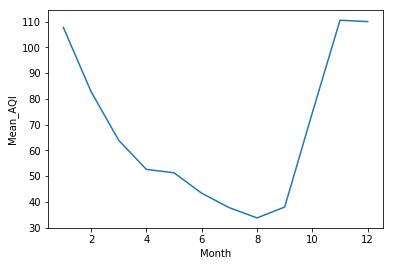

In [12]:
plt.xlabel('Month')
plt.ylabel('Mean_AQI')
plt.plot(by_month.index.get_level_values(0),by_month['PM2.5'])

## Mean AQI of all Cities varying with years (2015-20)

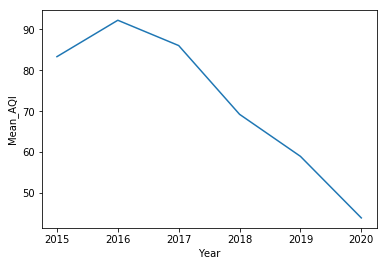

In [13]:
plt.xlabel('Year')
plt.ylabel('Mean_AQI')
plt.plot(by_year.index.get_level_values(0),by_year['PM2.5']) #Ignore 2020 as data is whole year data is not yet available.

In [14]:
city_data_not_2020=city_data[city_data.Date.dt.year!=2020]

In [15]:
by_month_not_2020=city_data_not_2020.groupby([city_data_not_2020.Date.dt.month]).mean()

### As we can see all over the India we see the triends of PM2.5 levels going down from June to September which are generally the months of monsoon. 

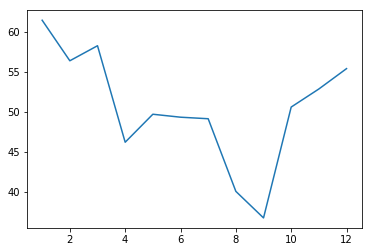

In [16]:
plt.plot(city_data[city_data.City=='Chennai'].groupby([city_data.Date.dt.month]).mean().index.get_level_values(0),city_data[city_data.City=='Chennai'].groupby([city_data.Date.dt.month]).mean()['PM2.5'])

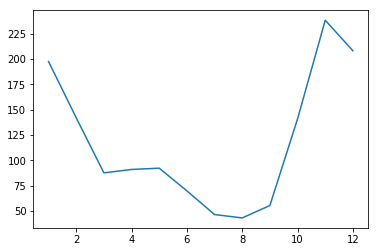

In [17]:
plt.plot(city_data[city_data.City=='Delhi'].groupby([city_data.Date.dt.month]).mean().index.get_level_values(0),city_data[city_data.City=='Delhi'].groupby([city_data.Date.dt.month]).mean()['PM2.5'])

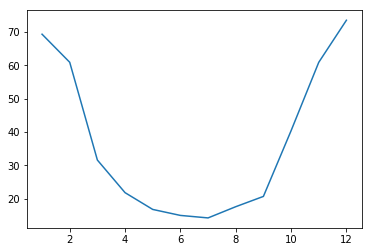

In [18]:
plt.plot(city_data[city_data.City=='Mumbai'].groupby([city_data.Date.dt.month]).mean().index.get_level_values(0),city_data[city_data.City=='Mumbai'].groupby([city_data.Date.dt.month]).mean()['PM2.5'])

- The Monsoon,clearly it has effect on PM2.5 as in Delhi and Mumbai in Monsoon years,June,July,August and September (6,7,8,9) PM 2.5 goes way down.Where as in Chennai where monsoon reaches far later than Delhi and Mumbai (North-East), has relatively high PM2.5 in June,July and starts dropping after that due to rainfall activity in October onwards

- We can also show the effect of Humidity in air on PM 2.5 as Mumbai and Chennai are costal cities, having higher humidity than Delhi,their graph of PM2.5 goes down where as Delhi's graph makes a small platue in around April and May.

# CO

## Lockdown Effect on CO in Mumbai-Delhi-Chennai (Feb-April 2020)

## Mumbai

### February

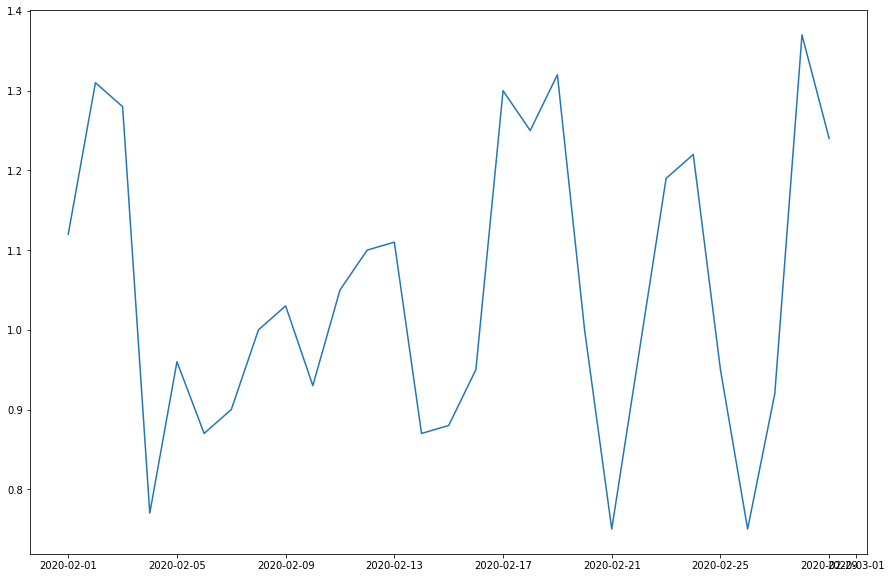

In [20]:
plt.figure(figsize=(15,10))
plt.plot(city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['Date'],city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['CO'])

### March

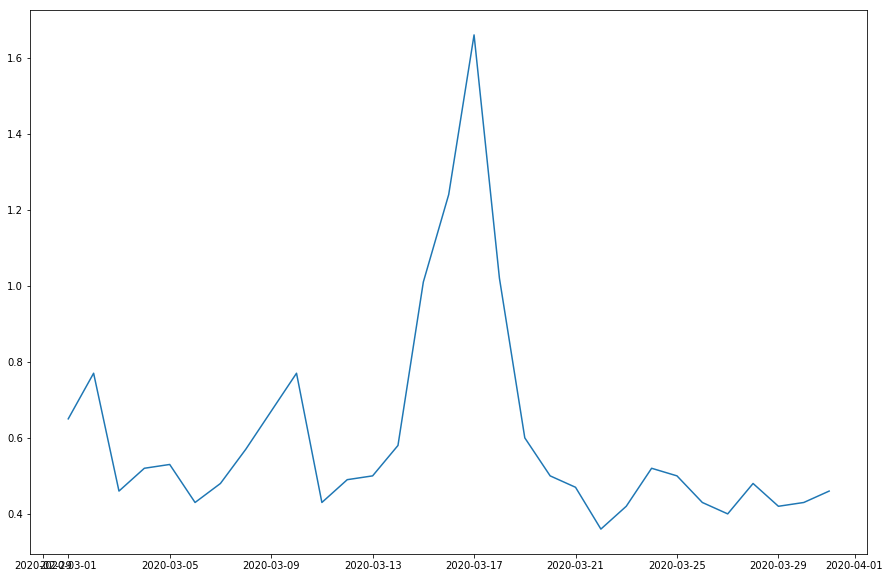

In [21]:
plt.figure(figsize=(15,10))
plt.plot(city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['Date'],city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['CO'])

### April

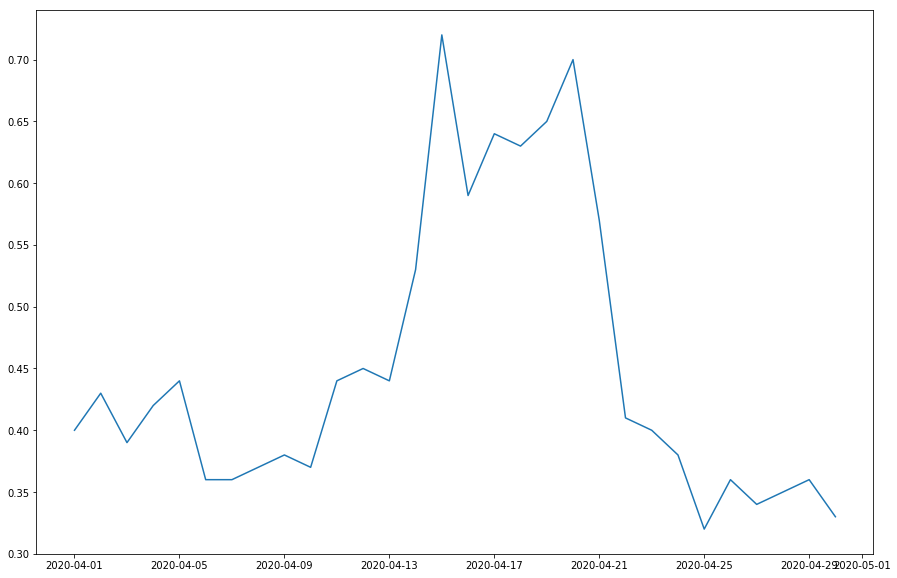

In [22]:
plt.figure(figsize=(15,10))
plt.plot(city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['Date'],city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['CO'])

In [23]:
Mean_co_for_Mumbai_Feb_2020=city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['CO'].mean()
Mean_co_for_Mumbai_March_2020=city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['CO'].mean()
Mean_co_for_Mumbai_April_2020=city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['CO'].mean()
print('Mean Carbon oxide in Feb 2020 in Mumbai',Mean_co_for_Mumbai_Feb_2020)
print('Mean Carbon oxide in March 2020 in Mumbai',Mean_co_for_Mumbai_March_2020)
print('Mean Carbon oxide in April 2020 in Mumbai',Mean_co_for_Mumbai_April_2020)

Mean Carbon oxide in Feb 2020 in Mumbai 1.046896551724138
Mean Carbon oxide in March 2020 in Mumbai 0.6054838709677419
Mean Carbon oxide in April 2020 in Mumbai 0.451


## Delhi

### February

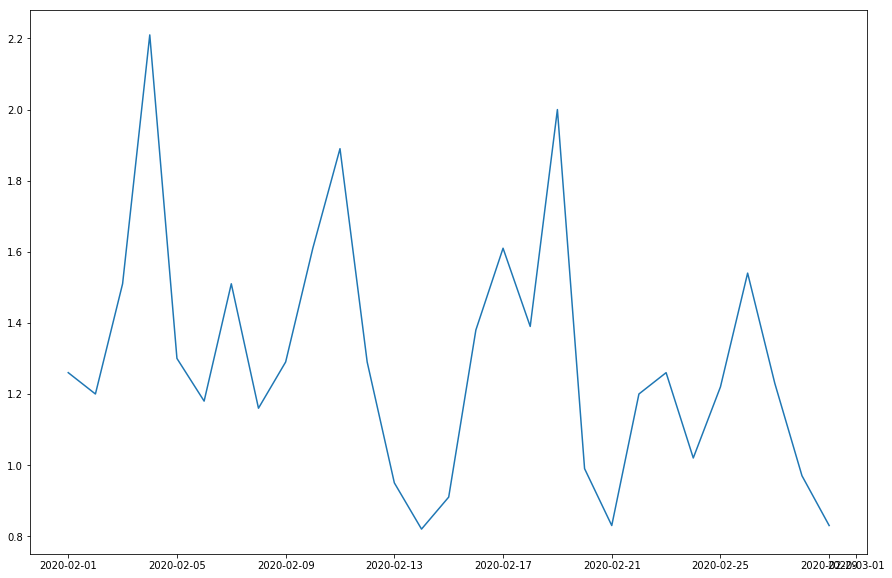

In [24]:
plt.figure(figsize=(15,10))
plt.plot(city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['Date'],city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['CO'])

### March

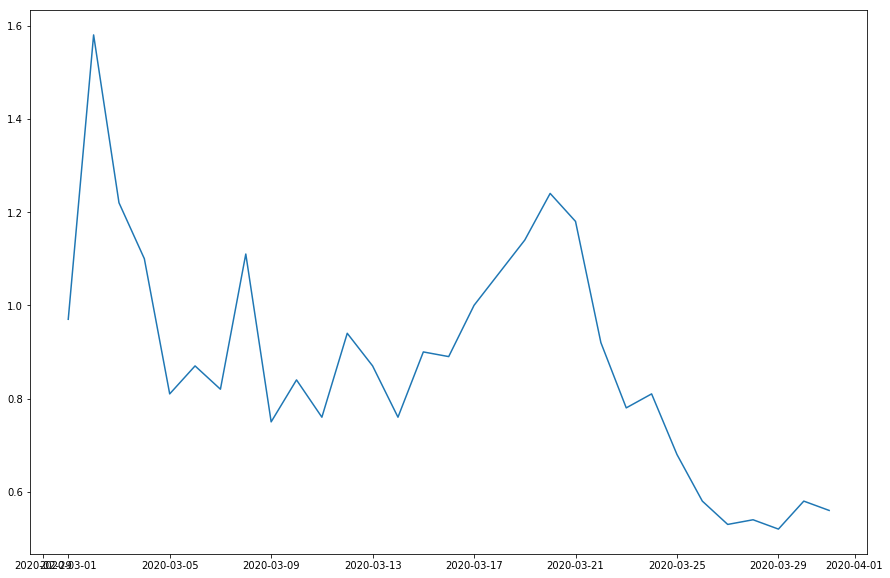

In [25]:
plt.figure(figsize=(15,10))
plt.plot(city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['Date'],city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['CO'])

### April

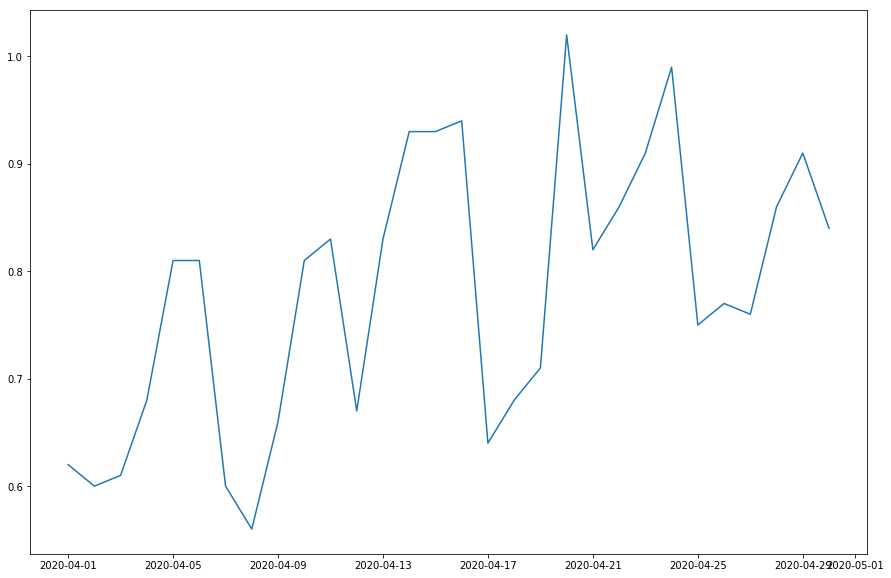

In [26]:
plt.figure(figsize=(15,10))
plt.plot(city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['Date'],city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['CO'])

In [27]:
Mean_co_for_Delhi_Feb_2020=city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['CO'].mean()
Mean_co_for_Delhi_March_2020=city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['CO'].mean()
Mean_co_for_Delhi_April_2020=city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['CO'].mean()
print('Mean Carbon oxide in Feb 2020 in Delhi',Mean_co_for_Delhi_Feb_2020)
print('Mean Carbon oxide in March 2020 in Delhi',Mean_co_for_Delhi_March_2020)
print('Mean Carbon oxide in April 2020 in Delhi',Mean_co_for_Delhi_April_2020)

Mean Carbon oxide in Feb 2020 in Delhi 1.295172413793103
Mean Carbon oxide in March 2020 in Delhi 0.881290322580645
Mean Carbon oxide in April 2020 in Delhi 0.7803333333333333


## Chennai

### February

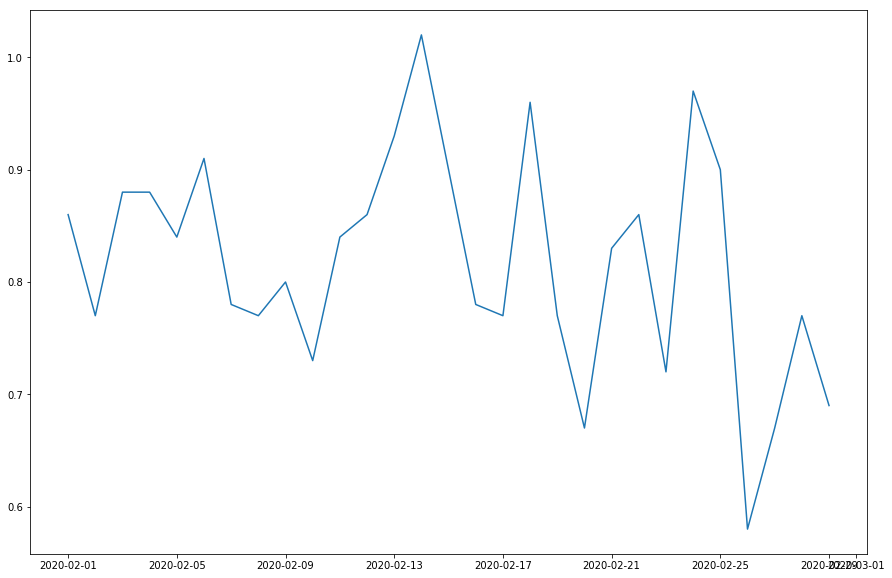

In [28]:
plt.figure(figsize=(15,10))
plt.plot(city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['Date'],city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['CO'])

### March

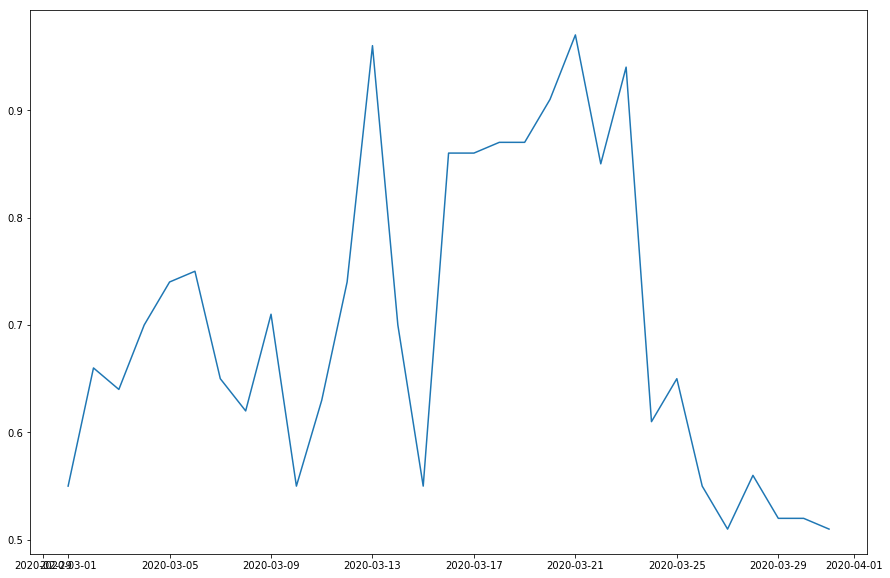

In [29]:
plt.figure(figsize=(15,10))
plt.plot(city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['Date'],city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['CO'])

### April

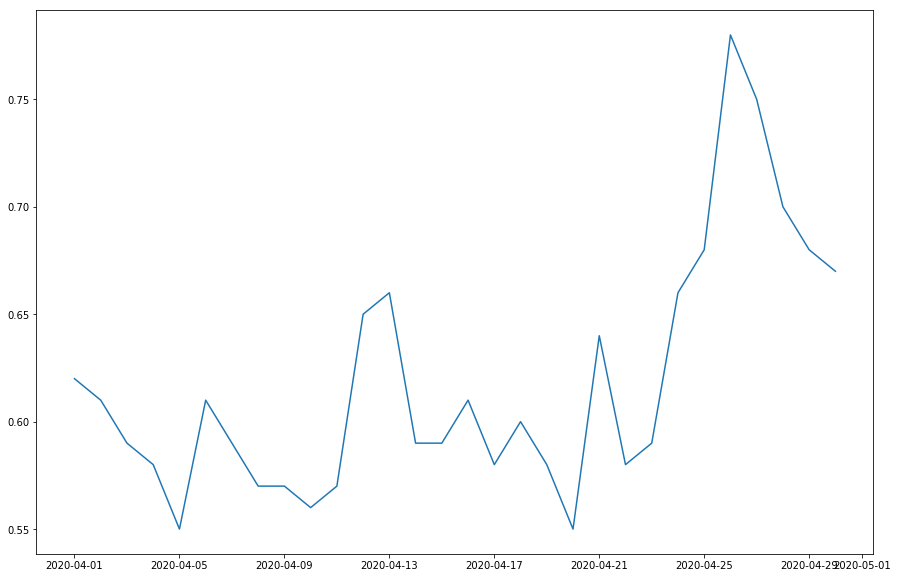

In [30]:
plt.figure(figsize=(15,10))
plt.plot(city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['Date'],city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['CO'])

In [31]:
Mean_co_for_Chennai_Feb_2020=city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['CO'].mean()
Mean_co_for_Chennai_March_2020=city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['CO'].mean()
Mean_co_for_Chennai_April_2020=city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['CO'].mean()
print('Mean Carbon oxide in Feb 2020 in Chennai',Mean_co_for_Chennai_Feb_2020)
print('Mean Carbon oxide in March 2020 in Chennai',Mean_co_for_Chennai_March_2020)
print('Mean Carbon oxide in April 2020 in Chennai',Mean_co_for_Chennai_April_2020)

Mean Carbon oxide in Feb 2020 in Chennai 0.8175862068965515
Mean Carbon oxide in March 2020 in Chennai 0.7003225806451613
Mean Carbon oxide in April 2020 in Chennai 0.6186666666666667


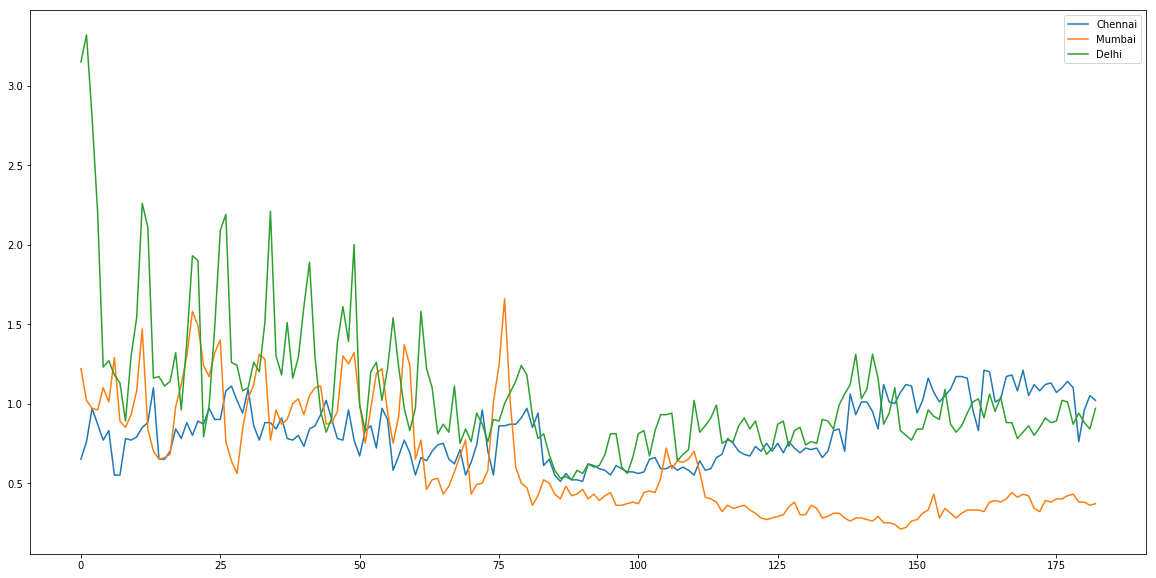

In [32]:
plt.figure(figsize=(20,10))
plt.plot(city_data[city_data.City=='Chennai'][(city_data.Date.dt.year==2020)]['CO'].reset_index(drop='True'),label='Chennai')
plt.plot(city_data[city_data.City=='Mumbai'][(city_data.Date.dt.year==2020)]['CO'].reset_index(drop='True'),label='Mumbai')
plt.plot(city_data[city_data.City=='Delhi'][(city_data.Date.dt.year==2020)]['CO'].reset_index(drop='True'),label='Delhi')
plt.legend()
plt.show()

# AQI
## Mean AQI data for 2020 across Indian cities

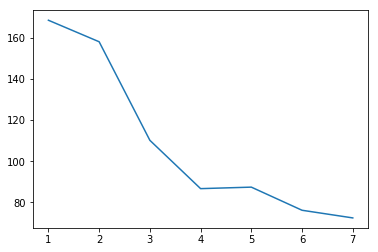

In [35]:
plt.plot(city_data[city_data.Date.dt.year==2020].groupby([city_data.Date.dt.month]).mean().index.get_level_values(0),city_data[city_data.Date.dt.year==2020].groupby([city_data.Date.dt.month]).mean()['AQI'])

## AQI of Indian cities during May-June Lockdown

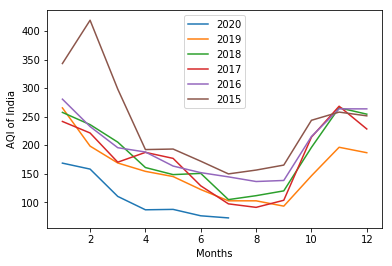

In [36]:
plt.xlabel('Months')
plt.ylabel('AQI of India')
plt.plot(city_data[city_data.Date.dt.year==2020].groupby(city_data.Date.dt.month)['AQI'].mean(),label='2020')
plt.plot(city_data[city_data.Date.dt.year==2019].groupby(city_data.Date.dt.month)['AQI'].mean(),label='2019')
plt.plot(city_data[city_data.Date.dt.year==2018].groupby(city_data.Date.dt.month)['AQI'].mean(),label='2018')
plt.plot(city_data[city_data.Date.dt.year==2017].groupby(city_data.Date.dt.month)['AQI'].mean(),label='2017')
plt.plot(city_data[city_data.Date.dt.year==2016].groupby(city_data.Date.dt.month)['AQI'].mean(),label='2016')
plt.plot(city_data[city_data.Date.dt.year==2015].groupby(city_data.Date.dt.month)['AQI'].mean(),label='2015')

plt.legend()
plt.show()

### Clear indication of Lockdown's effect on Air Quality in 2020 when compared to previous 5 years

# Comparison of 2020 AQI levels - Mumbai,Delhi and Chennai

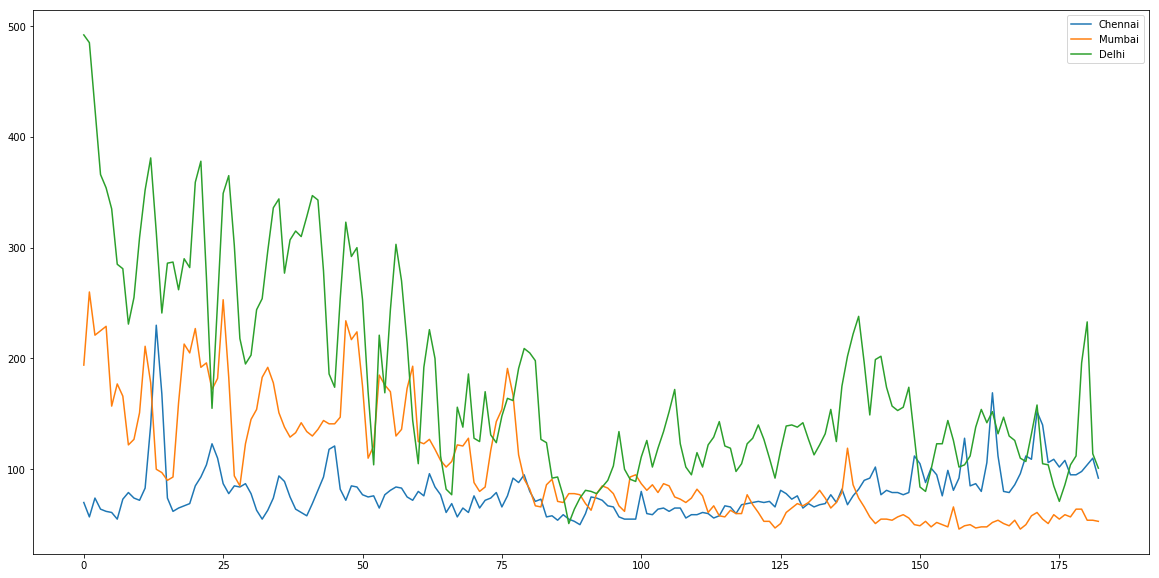

In [37]:
plt.figure(figsize=(20,10))
plt.plot(city_data[city_data.City=='Chennai'][(city_data.Date.dt.year==2020)]['AQI'].reset_index(drop='True'),label='Chennai')
plt.plot(city_data[city_data.City=='Mumbai'][(city_data.Date.dt.year==2020)]['AQI'].reset_index(drop='True'),label='Mumbai')
plt.plot(city_data[city_data.City=='Delhi'][(city_data.Date.dt.year==2020)]['AQI'].reset_index(drop='True'),label='Delhi')
plt.legend()
plt.show()

## Same trend as other variables proving that Lockdown has lowered the PM2.5,CO levels and AQI in India